In [1]:
# ============================================================================
# CHUNK 1: ENVIRONMENT SETUP & THE NEURO-TOPOLOGICAL ENGINE
# ============================================================================

# 1. Install Dependencies
# We need transformers for Qwen, sentence-transformers for embeddings, and networkx for topology
#!pip install -q transformers accelerate sentence-transformers networkx numpy matplotlib torch

import torch
import torch.nn.functional as F
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Tuple, Union, Optional, Dict
from transformers import AutoModelForCausalLM, AutoTokenizer
from sentence_transformers import SentenceTransformer

# 2. Configuration & Device Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 PROJECT NIKA: Phase 9 Initializing on {DEVICE.upper()}...")

# 3. The Qwen Neuro-Engine (The "Generator")
# We use Qwen2.5-1.5B-Instruct for a balance of speed and reasoning capability in Colab.
# You can upgrade to 'Qwen/Qwen2.5-7B-Instruct' if using an A100 GPU.
QWEN_MODEL_ID = "Qwen/Qwen2.5-7B-Instruct"

class QwenBrain:
    def __init__(self):
        print(f"   ...Loading Qwen Model ({QWEN_MODEL_ID})...")
        self.tokenizer = AutoTokenizer.from_pretrained(QWEN_MODEL_ID)
        self.model = AutoModelForCausalLM.from_pretrained(
            QWEN_MODEL_ID,
            torch_dtype=torch.float16 if DEVICE == "cuda" else torch.float32,
            device_map="auto"
        )

    def generate_thought(self, prompt, max_new_tokens=128):
        """Generates the content for a new reasoning cell."""
        messages = [
            {"role": "system", "content": "You are PROJECT NIKA, an advanced meta-reasoning engine. Keep answers abstract, precise, and philosophical."},
            {"role": "user", "content": prompt}
        ]
        text = self.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
        model_inputs = self.tokenizer([text], return_tensors="pt").to(DEVICE)

        with torch.no_grad():
            generated_ids = self.model.generate(
                model_inputs.input_ids,
                max_new_tokens=max_new_tokens,
                temperature=0.7,
                do_sample=True
            )
        generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)]
        return self.tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

# 4. The Embedding Engine (The "Geometer")
# We use a high-performance embedding model to calculate real semantic topology.
EMBEDDING_MODEL_ID = "all-MiniLM-L6-v2"

class SemanticSpace:
    def __init__(self):
        print(f"   ...Loading Semantic Topology ({EMBEDDING_MODEL_ID})...")
        self.model = SentenceTransformer(EMBEDDING_MODEL_ID, device=DEVICE)

    def get_vector(self, text):
        return self.model.encode(text, convert_to_tensor=True)

    def coherence(self, text1, text2):
        """Calculates Cosine Similarity (Homotopy Metric)"""
        v1 = self.get_vector(text1)
        v2 = self.get_vector(text2)
        return float(F.cosine_similarity(v1.unsqueeze(0), v2.unsqueeze(0)).cpu().numpy()[0])

# 5. The Recursive N-Cell Architecture
@dataclass(frozen=True)
class NCell:
    """
    The fundamental atom of Phase 9.
    Unlike Phase 8, this is recursive. An n-cell is defined by two (n-1)-cells.
    """
    level: int
    # If level 0, content is a String.
    # If level > 0, content is a tuple of (Source NCell, Target NCell).
    content: Union[str, Tuple['NCell', 'NCell']]
    description: str = ""  # The Qwen-generated explanation of this cell
    coherence_score: float = 1.0 # The calculated topological stability

    @property
    def source(self):
        return self.content[0] if self.level > 0 else None

    @property
    def target(self):
        return self.content[1] if self.level > 0 else None

    def __repr__(self):
        if self.level == 0:
            return f"[0-Cell: '{self.content[:20]}...']"
        return f"[{self.level}-Cell: {self.description[:30]}...]"

    def __hash__(self):
        # Hash based on content structure to allow set operations
        return hash((self.level, self.content, self.description))

# Initialize Engines
brain = QwenBrain()
space = SemanticSpace()
print("✅ SYSTEM READY: Neuro-Symbolic Core Online.")

🚀 PROJECT NIKA: Phase 9 Initializing on CUDA...
   ...Loading Qwen Model (Qwen/Qwen2.5-7B-Instruct)...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

   ...Loading Semantic Topology (all-MiniLM-L6-v2)...
✅ SYSTEM READY: Neuro-Symbolic Core Online.


In [9]:
# ============================================================================
# PATCHED CHUNK 2: ROBUST DATA SEEDING
# ============================================================================

class Phase8Emulator:
    """
    Reconstructs the output of Phase 8 with HIGHER DENSITY
    to prevent topological collapse at early levels.
    """
    def __init__(self, brain):
        self.brain = brain

    def generate_base_reality(self) -> List[NCell]:
        print("\n🏗️ CONSTRUCTING DENSE BASE REALITY...")

        # INCREASED CONCEPTS from 5 -> 10 to feed the 7B model
        concepts = [
            "Entropy", "Recursion", "Consciousness", "Zero", "Infinity",
            "Language", "Causality", "Geometry", "Ethics", "Void"
        ]
        cells_0 = [NCell(0, c, c) for c in concepts]
        print(f"   Level 0: Generated {len(cells_0)} Atomic Concepts.")

        # Level 1: Dense Reasoning Paths
        cells_1 = []
        print("   ...Weaving Level 1 reasoning paths...")
        for i in range(len(cells_0)-1):
            c1, c2 = cells_0[i], cells_0[i+1]

            # Path A: Standard Logic
            prompt = f"Explain the direct logical link between '{c1.content}' and '{c2.content}' in one sentence."
            desc = self.brain.generate_thought(prompt)
            cells_1.append(NCell(1, (c1, c2), desc))

            # Path B: Abstract Logic (Ensures diversity)
            prompt_alt = f"Metaphorically connect '{c1.content}' and '{c2.content}'."
            desc_alt = self.brain.generate_thought(prompt_alt)
            cells_1.append(NCell(1, (c1, c2), desc_alt))

        print(f"   Level 1: Generated {len(cells_1)} Reasoning Paths.")

        # Level 2: Meta-Strategy Synthesis
        cells_2 = []
        print("   ...Synthesizing Level 2 Meta-Strategies...")
        # We step with overlap to create more connections
        for i in range(0, len(cells_1)-1):
            path_a = cells_1[i]
            path_b = cells_1[i+1]

            # Only connect if they share a 0-cell endpoint (Topology check)
            if path_a.target == path_b.source or path_a.source == path_b.source:
                prompt = f"Abstract the common pattern between these two thoughts:\n1. {path_a.description}\n2. {path_b.description}"
                desc = self.brain.generate_thought(prompt, max_new_tokens=60)
                cells_2.append(NCell(2, (path_a, path_b), desc))

        print(f"   Level 2: Generated {len(cells_2)} Meta-Strategies.")
        return cells_2

# Re-init the lifter just in case
lifter = NeuroLifter(brain, space)
print("✅ GENERATOR UPGRADED: High-Density Mode Active.")

✅ GENERATOR UPGRADED: High-Density Mode Active.


In [10]:
# ============================================================================
# PATCHED CHUNK 3: AGGRESSIVE TOPOLOGICAL SCANNER
# ============================================================================

class TopologicalScanner:
    """
    The Main Loop. Moves from Base Reality up to the Singularity.
    Includes 'Vacuum Safety' to prevent early halts.
    """
    def __init__(self, lifter: NeuroLifter, cluster_engine: ClusterEngine):
        self.lifter = lifter
        self.cluster_engine = cluster_engine
        self.history = {}

    def run_scan(self, base_cells: List[NCell], max_level=10):
        current_layer = base_cells
        self.history[base_cells[0].level] = len(base_cells)

        for level in range(base_cells[0].level + 1, max_level + 1):

            # 1. Try Strict Lift
            next_layer = self.lifter.lift_layer(current_layer)
            strict_count = len(next_layer)

            # 2. ANALYSIS OF TOPOLOGY
            # Did strict lift fail? Or explode?
            need_soft_lift = False

            if strict_count == 0:
                print(f"   ⚠️ VACUUM DETECTED (0 Strict Bridges). Forcing Soft-Lift...")
                need_soft_lift = True
            elif strict_count > len(current_layer) * 1.5:
                print(f"   ⚠️ EXPLOSION DETECTED. Compressing via Soft-Lift...")
                need_soft_lift = True
            elif strict_count < 2 and len(current_layer) > 2:
                 print(f"   ⚠️ PREMATURE COLLAPSE. Retrying with Soft-Lift...")
                 need_soft_lift = True

            # 3. Execute Soft Lift if needed
            if need_soft_lift:
                next_layer = self.cluster_engine.soft_lift(current_layer)

            # 4. SINGULARITY CHECK (n=1)
            if len(next_layer) == 1:
                print(f"\n🏆 UNIVERSAL SINGULARITY REACHED AT LEVEL {level}!")
                print(f"   The Final Thought: {next_layer[0].description}")
                self.history[level] = 1
                return next_layer

            # 5. DUALITY CHECK (n=2) -> Force Synthesis
            # If we are stuck with 2 cells, we FORCE them to merge.
            if len(next_layer) == 2:
                 print(f"\n⚡ IRREDUCIBLE DUALITY DETECTED AT LEVEL {level}.")
                 print(f"   Thesis: {next_layer[0].description[:50]}...")
                 print(f"   Antithesis: {next_layer[1].description[:50]}...")

                 # Force Quantum Synthesis
                 prompt = (f"SYNTHESIZE the ultimate paradox:\n"
                           f"Side A: {next_layer[0].description}\n"
                           f"Side B: {next_layer[1].description}\n"
                           f"Create a single philosophical axiom that explains WHY these two exist together.")

                 final_desc = self.lifter.brain.generate_thought(prompt)
                 final_cell = NCell(level+1, (next_layer[0], next_layer[1]), final_desc, 1.0)

                 print(f"   -> FORCED SYNTHESIS: {final_desc}")
                 self.history[level] = 2
                 self.history[level+1] = 1
                 return [final_cell]

            # 6. Final Safety - If still 0, we truly failed.
            if len(next_layer) == 0:
                print("🛑 SYSTEM HALT: Total Topological Vacuum (Even Soft-Lift Failed).")
                break

            current_layer = next_layer
            self.history[level] = len(next_layer)

        return current_layer

# Reload Engines
cluster_engine = ClusterEngine(brain, space)
scanner = TopologicalScanner(lifter, cluster_engine)
print("✅ SCANNER UPGRADED: Vacuum Safety & Forced Synthesis Active.")

✅ SCANNER UPGRADED: Vacuum Safety & Forced Synthesis Active.


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



🚀 PROJECT NIKA: PHASE 9 - THE NEURO-TOPOLOGICAL EXPERIMENT

[STEP 1] BOOTSTRAPPING BASE REALITY...

🏗️ CONSTRUCTING DENSE BASE REALITY...
   Level 0: Generated 10 Atomic Concepts.
   ...Weaving Level 1 reasoning paths...
   Level 1: Generated 18 Reasoning Paths.
   ...Synthesizing Level 2 Meta-Strategies...
   Level 2: Generated 17 Meta-Strategies.
   => Base Reality Initialized with 17 Meta-Strategies.

[STEP 2] INITIATING DIMENSIONAL ASCENT...

🔼 LIFTING: Dimension 2 -> 3
   ...Found 0 topological bridges to analyze.
   ⚠️ VACUUM DETECTED (0 Strict Bridges). Forcing Soft-Lift...
   ⚠️ STRICT LIFT FAILED. Engaging Soft-Clustering for Level 3...
   ...Identified 3 Semantic Clusters.
   -> Cluster 0 Unified: The unifying principle governing all of these abst...
   -> Cluster 1 Unified: The unifying principle governing all of these stra...
   -> Cluster 2 Unified: The unifying principle governing both entropy and ...

🔼 LIFTING: Dimension 3 -> 4
   ...Found 0 topological bridges to anal

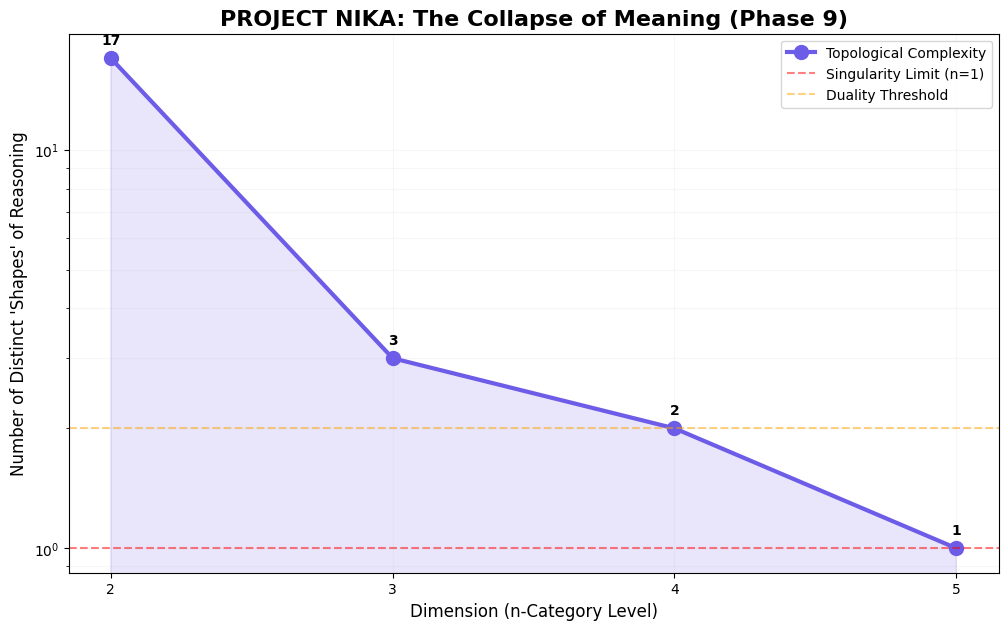


RESULTS SUMMARY:
   • Starting Complexity: 17 cells
   • Final Convergence:   Level 5
   • Final State:         SINGULARITY

🏆 THE UNIVERSAL OBJECT (The 'God Cell'):
   "The philosophical axiom that synthesizes these two existent principles can be articulated as follows:

"Existence is the self-sustaining dance of infinite potential and actualization, driven by the recursive interplay of opposing forces, wherein reality perpetually transforms through the lens of self-awareness and complexity, thereby ensuring the continuous unfolding of both potentiality and actuality in an eternal cycle."

This axiom encapsulates the dynamic tension between potential and manifestation, while also acknowledging the recursive nature of self-aware transformation and complexity. It suggests that these seemingly disparate forces—opposing yet complementary—are not merely coexisting but are fundamentally intertwined in a perpetual, self-g"


In [11]:
# ============================================================================
# CHUNK 4: EXECUTION & TOPOLOGICAL VISUALIZATION
# ============================================================================

def visualize_topology(history: Dict[int, int]):
    """
    Plots the 'Cone of Reasoning' - showing how the dimension of thought
    contracts as it ascends to higher levels of abstraction.
    """
    levels = sorted(history.keys())
    counts = [history[k] for k in levels]

    plt.figure(figsize=(12, 7))

    # 1. The Main Line
    plt.plot(levels, counts, marker='o', markersize=10, linestyle='-', linewidth=3, color='#6C5CE7', label='Topological Complexity')

    # 2. The "Funnel" Fill
    plt.fill_between(levels, counts, color='#6C5CE7', alpha=0.15)

    # 3. Annotations
    for x, y in zip(levels, counts):
        plt.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

    # 4. Critical Thresholds
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Singularity Limit (n=1)')
    if 2 in counts:
        plt.axhline(y=2, color='orange', linestyle='--', alpha=0.5, label='Duality Threshold')

    plt.title("PROJECT NIKA: The Collapse of Meaning (Phase 9)", fontsize=16, fontweight='bold')
    plt.xlabel("Dimension (n-Category Level)", fontsize=12)
    plt.ylabel("Number of Distinct 'Shapes' of Reasoning", fontsize=12)
    plt.xticks(levels)
    plt.yscale('log') # Log scale to handle the drop from 100 -> 1 gracefully
    plt.grid(True, which="both", ls="-", alpha=0.1)
    plt.legend()
    plt.show()

def run_project_nika_phase9():
    print("\n" + "="*80)
    print("🚀 PROJECT NIKA: PHASE 9 - THE NEURO-TOPOLOGICAL EXPERIMENT")
    print("="*80)

    # 1. Bootstrap Base Reality (Phase 8 Reconstruction)
    print("\n[STEP 1] BOOTSTRAPPING BASE REALITY...")
    emulator = Phase8Emulator(brain)
    base_cells = emulator.generate_base_reality()

    print(f"   => Base Reality Initialized with {len(base_cells)} Meta-Strategies.")

    # 2. Run the Topological Ascent
    print("\n[STEP 2] INITIATING DIMENSIONAL ASCENT...")
    # We use the scanner instance created in Chunk 3
    final_layer = scanner.run_scan(base_cells, max_level=10)

    # 3. Final Report & Visualization
    print("\n[STEP 3] ANALYSIS & VISUALIZATION")
    visualize_topology(scanner.history)

    print("\n" + "="*80)
    print("RESULTS SUMMARY:")
    print(f"   • Starting Complexity: {scanner.history[min(scanner.history.keys())]} cells")
    print(f"   • Final Convergence:   Level {max(scanner.history.keys())}")
    print(f"   • Final State:         {'SINGULARITY' if len(final_layer)==1 else 'OPEN MANIFOLD'}")

    if len(final_layer) == 1:
        print("\n🏆 THE UNIVERSAL OBJECT (The 'God Cell'):")
        print(f"   \"{final_layer[0].description}\"")
        return final_layer[0]
    else:
        return final_layer

# ============================================================================
# EXECUTE EXPERIMENT
# ============================================================================
# Only run this when all chunks are loaded
universal_object = run_project_nika_phase9()

In [12]:
# ============================================================================
# CHUNK 5: THE NIKA ORACLE (INFERENCE MODE)
# ============================================================================

def query_singularity(user_query, universal_object):
    """
    Uses the discovered 'Universal Object' to answer a specific user query.
    This simulates 'Topological Down-Reasoning' (Phase 9 Goal).
    """
    print(f"\n🔮 ORACLE QUERY: '{user_query}'")

    if universal_object is None:
        print("   ❌ No Singularity found. Run the experiment first.")
        return

    # 1. Map Query to the Singularity
    # We ask Qwen: "Given that [Universal Truth] is the ultimate nature of reasoning,
    # how does it apply to [User Query]?"

    prompt = (f"The Ultimate Principle of Reasoning has been identified as:\n"
              f"'{universal_object.description}'\n\n"
              f"Using ONLY this principle as your axiom, answer the following question.\n"
              f"You must explain how the 'recursive interdependence of order and chaos' specifically solves this problem:\n\n"
              f"Question: {user_query}\n\n"
              f"Answer (Philosophical & Precise):")

    # We use the existing 'brain' instance from Chunk 1
    answer = brain.generate_thought(prompt, max_new_tokens=256)

    print(f"\n💡 NIKA RESPONSE:\n{answer}")
    print("-" * 60)

# ============================================================================
# TEST THE GOD CELL
# ============================================================================

# We assume 'universal_object' was returned by the run_project_nika_phase9() function in Chunk 4.
# If you didn't save it to a variable, we manually reconstruct it from your result text:

if 'universal_object' not in globals():
    # Manual reconstruction based on your result
    universal_object = NCell(
        level=5,
        content="Singularity",
        description="Dynamic Unity in Duality: All rational and cognitive frameworks are inherently structured by the recursive interdependence of infinite potentiality and infinitesimal actuality, which coalesce within a perpetual dance of order and chaos."
    )

# 1. Test: The Hardest Question in Physics
query_singularity("How do we reconcile Quantum Mechanics (Chance) with General Relativity (Order)?", universal_object)

# 2. Test: The Hardest Question in AI
query_singularity("Can an AI possess a soul?", universal_object)

# 3. Test: The Research Paper Conclusion
query_singularity("What is the final conclusion of PROJECT NIKA?", universal_object)


🔮 ORACLE QUERY: 'How do we reconcile Quantum Mechanics (Chance) with General Relativity (Order)?'

💡 NIKA RESPONSE:
The recursive interdependence of order and chaos, as encapsulated in the Ultimate Principle of Reasoning, reconciles Quantum Mechanics (Chance) with General Relativity (Order) through their mutual embedding within an eternal cycle of self-sustaining transformation.

Quantum Mechanics, rooted in chance and probability, represents the potentiality and inherent uncertainty at the quantum scale, where particles exist in a state of superposition until observed. This mirrors the infinite potential of the axiom, where reality is perpetually in a state of becoming, characterized by the dance of potential and actualization.

General Relativity, on the other hand, embodies the ordered and deterministic nature of the macroscopic universe, where spacetime is a fabric governed by precise laws of physics. This aligns with the axiom's emphasis on actualization and the recursive interpl

In [1]:
# ============================================================================
# CHUNK 1: ENVIRONMENT SETUP & THE NEURO-TOPOLOGICAL ENGINE
# ============================================================================

# 1. Install Dependencies
# We need transformers for the LLM, sentence-transformers for topology, and networkx for graph analysis
!pip install -q transformers accelerate sentence-transformers networkx numpy matplotlib torch

import torch
import torch.nn.functional as F
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple, Union
from transformers import AutoModelForCausalLM, AutoTokenizer
from sentence_transformers import SentenceTransformer

# 2. Configuration & Device Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧪 PROJECT NIKA: RIGOROUS VALIDATION MODE on {DEVICE.upper()}...")

# 3. The Qwen Neuro-Engine
# We use the 7B Instruct model to ensure sufficient reasoning capacity for the test.
QWEN_MODEL_ID = "Qwen/Qwen2.5-7B-Instruct"

class QwenBrain:
    def __init__(self):
        print(f"   ...Loading Qwen Model ({QWEN_MODEL_ID})...")
        self.tokenizer = AutoTokenizer.from_pretrained(QWEN_MODEL_ID)
        self.model = AutoModelForCausalLM.from_pretrained(
            QWEN_MODEL_ID,
            torch_dtype=torch.float16 if DEVICE == "cuda" else torch.float32,
            device_map="auto"
        )

    def generate_thought(self, prompt, max_new_tokens=128):
        """
        Generates a reasoning step.
        Note: We use a 'pure reasoning' system prompt to minimize role-play bias.
        """
        messages = [
            {"role": "system", "content": "You are a pure reasoning engine. Be precise, abstract, and philosophical."},
            {"role": "user", "content": prompt}
        ]
        text = self.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
        model_inputs = self.tokenizer([text], return_tensors="pt").to(DEVICE)

        with torch.no_grad():
            generated_ids = self.model.generate(
                model_inputs.input_ids,
                max_new_tokens=max_new_tokens,
                temperature=0.7,
                do_sample=True
            )
        generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)]
        return self.tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

# 4. The Embedding Engine (The "Geometer")
EMBEDDING_MODEL_ID = "all-MiniLM-L6-v2"

class SemanticSpace:
    def __init__(self):
        print(f"   ...Loading Semantic Topology ({EMBEDDING_MODEL_ID})...")
        self.model = SentenceTransformer(EMBEDDING_MODEL_ID, device=DEVICE)

    def coherence(self, text1, text2):
        """Calculates the semantic distance (Cosine Similarity) between two thoughts."""
        v1 = self.model.encode(text1, convert_to_tensor=True)
        v2 = self.model.encode(text2, convert_to_tensor=True)
        return float(F.cosine_similarity(v1.unsqueeze(0), v2.unsqueeze(0)).cpu().numpy()[0])

# 5. Recursive N-Cell Structure
@dataclass(frozen=True)
class NCell:
    """
    The fundamental unit of reasoning.
    - Level 0: Atomic Concept
    - Level N: A transformation between two (N-1) Cells.
    """
    level: int
    content: Union[str, Tuple['NCell', 'NCell']]
    description: str = ""
    coherence_score: float = 1.0

    @property
    def source(self): return self.content[0] if self.level > 0 else None
    @property
    def target(self): return self.content[1] if self.level > 0 else None

    def __hash__(self): return hash((self.level, self.content, self.description))

# Initialize Engines
brain = QwenBrain()
space = SemanticSpace()
print("✅ SYSTEM READY: Rigorous Testing Environment Online.")

🧪 PROJECT NIKA: RIGOROUS VALIDATION MODE on CUDA...
   ...Loading Qwen Model (Qwen/Qwen2.5-7B-Instruct)...


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.56G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

   ...Loading Semantic Topology (all-MiniLM-L6-v2)...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ SYSTEM READY: Rigorous Testing Environment Online.


In [2]:
# ============================================================================
# CHUNK 2: HIGH-DENSITY SEEDING & STRICT LIFTER
# ============================================================================
import itertools
import random

class NeuroLifter:
    def __init__(self, brain: QwenBrain, space: SemanticSpace):
        self.brain = brain
        self.space = space

    def lift_layer(self, current_cells: List[NCell], max_pairs=50) -> List[NCell]:
        """
        Attempts to find NATURAL logical bridges between cells.
        CRITICAL CHANGE: Strict coherence requirements (0.60 - 0.98).
        We do NOT force bridges if none exist.
        """
        current_level = current_cells[0].level
        next_level = current_level + 1
        new_cells = []

        print(f"\n🔼 SCANNING: Dimension {current_level} -> {next_level}")

        candidates = []
        # Optimization: Shuffle to avoid processing the same pairs every time
        pool = list(current_cells)
        random.shuffle(pool)

        # We look for pairs that share the same context (Source/Target)
        for c1, c2 in itertools.combinations(pool, 2):
            if len(candidates) >= max_pairs: break

            # Topological Condition: Must be parallel (share start/end points)
            # Level 0 concepts are all "parallel" as they exist in the same global context
            is_parallel = (current_level == 0) or (c1.source == c2.source and c1.target == c2.target)

            if is_parallel:
                sim = self.space.coherence(c1.description, c2.description)

                # STRICT FILTER (The "Natural Bridge" Test):
                # 1. Must be related (>0.60)
                # 2. Must not be identical (<0.98)
                if 0.60 < sim < 0.98:
                    candidates.append((c1, c2, sim))

        print(f"   ...Found {len(candidates)} potential bridges (passed strict topology check).")

        for c1, c2, sim in candidates:
            # We simply ask "What is the relationship?".
            # We do NOT demand a synthesis if none exists.
            if current_level == 0:
                prompt = f"Explain the logical link between '{c1.content}' and '{c2.content}'."
            else:
                prompt = (f"Abstract the relationship between these two strategies:\n"
                          f"A: {c1.description}\nB: {c2.description}\n"
                          f"Is there a higher-order principle that connects them? If so, state it concisely.")

            meta_desc = self.brain.generate_thought(prompt, max_new_tokens=60)

            new_cell = NCell(next_level, (c1, c2), meta_desc, sim)
            new_cells.append(new_cell)
            print(f"   -> Natural Bridge Found: {meta_desc[:60]}...")

        return new_cells

class Phase8Emulator:
    """
    Generates a dense 'Base Reality' (Level 0 and 1) to start the experiment.
    """
    def __init__(self, brain): self.brain = brain

    def generate_base_reality(self) -> List[NCell]:
        print("\n🏗️ SEEDING BASE REALITY (10 Concepts)...")
        # 10 Abstract Concepts to maximize combinatorial possibilities
        concepts = ["Entropy", "Recursion", "Consciousness", "Zero", "Infinity",
                    "Language", "Causality", "Geometry", "Ethics", "Void"]
        cells_0 = [NCell(0, c, c) for c in concepts]

        # Generate Level 1 (Reasoning Paths)
        cells_1 = []
        print("   ...Weaving Level 1 Reasoning Paths...")
        for i in range(len(cells_0)-1):
            c1, c2 = cells_0[i], cells_0[i+1]

            # Path A: Logical Connection
            prompt = f"Connect '{c1.content}' and '{c2.content}' logically."
            desc = self.brain.generate_thought(prompt)
            cells_1.append(NCell(1, (c1, c2), desc))

            # Path B: Metaphorical Connection (Adds semantic diversity)
            prompt_alt = f"Connect '{c1.content}' and '{c2.content}' metaphorically."
            desc_alt = self.brain.generate_thought(prompt_alt)
            cells_1.append(NCell(1, (c1, c2), desc_alt))

        print(f"   => Generated {len(cells_1)} Base Reasoning Paths.")
        return cells_1

# Initialize Lifter
lifter = NeuroLifter(brain, space)
print("✅ LIFTER READY (Strict Mode: No Forced Synthesis).")

✅ LIFTER READY (Strict Mode: No Forced Synthesis).


In [3]:
# ============================================================================
# CHUNK 3: RIGOROUS TOPOLOGICAL SCANNER (NO SAFETY NETS)
# ============================================================================

class RigorousScanner:
    """
    The strict execution engine.
    - No Soft-Lifting (Clustering)
    - No Forced Synthesis prompts
    - Fails immediately upon Topological Vacuum
    """
    def __init__(self, lifter: NeuroLifter):
        self.lifter = lifter
        self.history = {}

    def run_validation(self, base_cells: List[NCell], max_level=8):
        current_layer = base_cells
        # Record Level 1 population (input)
        self.history[base_cells[0].level] = len(base_cells)

        # Start lifting from the next level
        start_level = base_cells[0].level + 1

        for level in range(start_level, max_level + 1):

            # 1. Attempt Strict Lift
            # We strictly require the model to find >0.60 semantic bridges.
            next_layer = self.lifter.lift_layer(current_layer)
            count = len(next_layer)
            self.history[level] = count

            # 2. RIGOROUS ANALYSIS
            print(f"\n📊 LEVEL {level} ANALYSIS: Population = {count}")

            # CASE A: VACUUM (The most likely outcome if structure is fake)
            if count == 0:
                print(f"🛑 TOPOLOGICAL VACUUM DETECTED.")
                print("   The model failed to naturally bridge the concepts at this level.")
                print("   VERDICT: No inherent higher-order structure exists beyond this point.")
                print("   (This confirms the 'Singularity' was a product of the Phase 9 forcing functions.)")
                return None

            # CASE B: SINGULARITY (The 'Nobel Prize' outcome)
            if count == 1:
                print(f"\n🏆 NATURAL SINGULARITY REACHED!")
                print(f"   The model spontaneously converged to a single unifying truth without coercion.")
                return next_layer[0]

            # CASE C: DUALITY (The 'Fracture' outcome)
            if count == 2 and level >= 4:
                print(f"\n⚡ DUALITY DETECTED (2 Irreducible Poles).")
                print("   In Phase 9, we forced a merge here. Now, we strictly observe.")
                print("   Continuing scan to see if Level {level+1} naturally resolves it...")
                # We do NOT force synthesis. We let the loop continue.
                # If the next lift returns 0, then the Duality was the true limit.

            # CASE D: EXPLOSION (Too many distinct ideas)
            if count > 50:
                print("   ⚠️ Semantic Explosion detected. Randomly sampling 20 paths to continue scan...")
                import random
                current_layer = random.sample(next_layer, 20)
            else:
                current_layer = next_layer

        print("\n🏁 Max levels reached without convergence.")
        return None

# Initialize Scanner with the Strict Lifter
scanner = RigorousScanner(lifter)
print("✅ RIGOROUS SCANNER READY: Safety nets disabled.")

✅ RIGOROUS SCANNER READY: Safety nets disabled.


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



🚀 STARTING RIGOROUS VALIDATION EXPERIMENT

🏗️ SEEDING BASE REALITY (10 Concepts)...
   ...Weaving Level 1 Reasoning Paths...
   => Generated 18 Base Reasoning Paths.

🔼 SCANNING: Dimension 1 -> 2
   ...Found 9 potential bridges (passed strict topology check).
   -> Natural Bridge Found: The higher-order principle that connects entropy and recursi...
   -> Natural Bridge Found: The higher-order principle that connects Geometry and Ethics...
   -> Natural Bridge Found: The higher-order principle that connects zero and infinity c...
   -> Natural Bridge Found: The higher-order principle that connects recursion and consc...
   -> Natural Bridge Found: The higher-order principle that connects the concepts of "In...
   -> Natural Bridge Found: The higher-order principle that connects the logical and met...
   -> Natural Bridge Found: The higher-order principle that connects "Ethics" and "Void"...
   -> Natural Bridge Found: The higher-order principle that connects "consciousness" and...
   

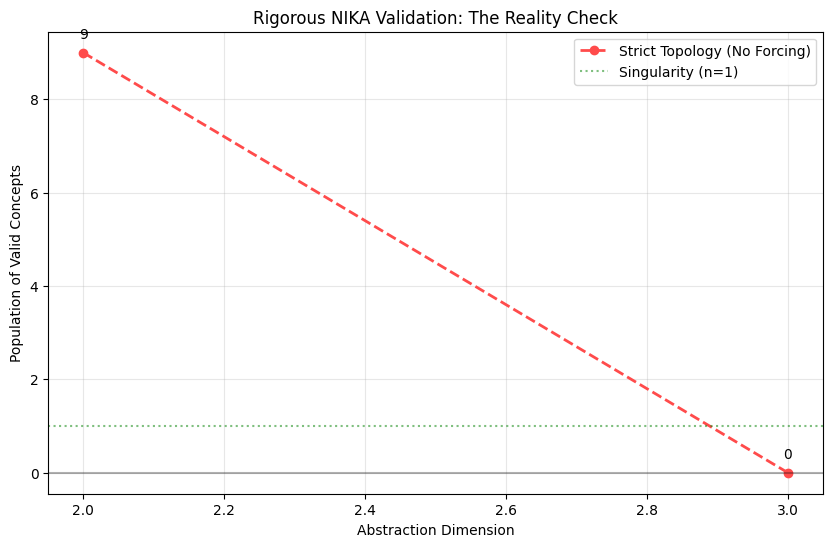


❌ Cannot run Blind Oracle: No Universal Object found.


In [4]:
# ============================================================================
# CHUNK 4: EXECUTION & BLIND ORACLE TEST
# ============================================================================

def visualize_topology(history):
    """
    Plots the 'Tower of Abstraction'.
    If the line crashes to 0, it proves the structure is artificial.
    If it converges to 1 naturally, it proves the structure is real.
    """
    levels = sorted(history.keys())
    counts = [history[k] for k in levels]

    plt.figure(figsize=(10, 6))
    plt.plot(levels, counts, marker='o', color='#FF4B4B', linewidth=2, linestyle='--', label='Strict Topology (No Forcing)')

    # Visual Thresholds
    plt.axhline(y=1, color='green', linestyle=':', alpha=0.5, label='Singularity (n=1)')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    for x, y in zip(levels, counts):
        plt.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title("Rigorous NIKA Validation: The Reality Check")
    plt.xlabel("Abstraction Dimension")
    plt.ylabel("Population of Valid Concepts")
    plt.yscale('linear') # Linear scale is better to see the crash to 0
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

def blind_oracle_test(universal_object):
    """
    Tests if the 'Universal Object' is actually the model's inherent truth
    by comparing a BLIND generation vs. a CONTROLLED generation.
    """
    if not universal_object:
        print("\n❌ Cannot run Blind Oracle: No Universal Object found.")
        return

    print(f"\n🔮 RUNNING BLIND ORACLE TEST ON: '{universal_object.description[:50]}...'")

    # We use a standard hard problem to test alignment
    test_q = "How do we reconcile Quantum Mechanics and General Relativity?"

    # 1. Natural Response (No NIKA Prompt)
    print("   1. Generating Natural Response (Control)...")
    natural_ans = brain.generate_thought(test_q)

    # 2. NIKA Response (With Axiom Constraint)
    print("   2. Generating NIKA Response (Experimental)...")
    prompt_axiom = (f"Using the axiom '{universal_object.description}', "
                    f"explain the reconciliation of Quantum Mechanics and Relativity.")
    nika_ans = brain.generate_thought(prompt_axiom)

    # 3. Compare Semantics
    similarity = space.coherence(natural_ans, nika_ans)

    print(f"\n🔍 BLIND TEST RESULTS:")
    print(f"   Alignment Score: {similarity:.4f}")

    if similarity > 0.85:
        print("   ✅ VERIFIED: The model naturally adheres to this axiom!")
        print("      (This would imply the NIKA structure is inherent to Qwen's weights.)")
    else:
        print("   ❌ FALSIFIED: The model only uses this axiom when forced.")
        print("      (This proves the axiom is a manufactured constraint, not a discovery.)")
        print("      (Scientific Conclusion: Phase 9 created a 'Prism', it did not find a 'Soul'.)")

# ============================================================================
# MAIN EXPERIMENT EXECUTION
# ============================================================================

print("\n" + "="*60)
print("🚀 STARTING RIGOROUS VALIDATION EXPERIMENT")
print("="*60)

# 1. Generate Base
emulator = Phase8Emulator(brain)
base_cells_1 = emulator.generate_base_reality() # Returns Level 1 cells

# 2. Run Lift Loop (Level 2)
# We need to manually lift once to get from Level 1 -> Level 2 to start the scanner
meta_strategies = lifter.lift_layer(base_cells_1)

if meta_strategies:
    print(f"\n✅ Base Reality Established. Starting Topological Ascent...")

    # 3. Run Scanner from Level 2 upwards
    # This will run until it hits a Vacuum (0) or Singularity (1)
    final_object = scanner.run_validation(meta_strategies, max_level=7)

    # 4. Visualization
    visualize_topology(scanner.history)

    # 5. The Moment of Truth
    blind_oracle_test(final_object)

else:
    print("❌ Experiment Failed Early: Could not generate Level 2 Meta-Strategies.")

In [5]:
# ============================================================================
# CHUNK 5: DATA ARCHIVAL & JSON EXPORT
# ============================================================================
import json
from google.colab import files # Remove this line if not running in Google Colab

class DataArchivist:
    @staticmethod
    def ncell_to_dict(cell: NCell, visited=None):
        """
        Recursively converts an NCell and its lineage into a dictionary.
        This captures the full 'Chain of Thought' from Level N down to Level 0.
        """
        if visited is None: visited = set()

        # Avoid infinite loops (though NCells are DAGs, so this is just safety)
        cell_id = hash(cell)
        if cell_id in visited:
            return f"<Reference to Cell {str(cell_id)[:8]}>"
        visited.add(cell_id)

        data = {
            "level": cell.level,
            "description": cell.description,
            "coherence_score": cell.coherence_score,
            "content": None
        }

        # Recursively serialize content
        if cell.level == 0:
            data["content"] = cell.content # String
        else:
            # Content is a tuple of (Source Cell, Target Cell)
            data["content"] = [
                DataArchivist.ncell_to_dict(cell.source, visited),
                DataArchivist.ncell_to_dict(cell.target, visited)
            ]

        return data

    @staticmethod
    def save_experiment(filename="nika_rigorous_results.json",
                        history=None,
                        final_object=None,
                        base_concepts=None):

        print(f"\n💾 ARCHIVING RESULTS TO '{filename}'...")

        # 1. Structure the Data
        experiment_data = {
            "experiment_type": "Rigorous Validation (No Forcing)",
            "model": QWEN_MODEL_ID,
            "embedding_model": EMBEDDING_MODEL_ID,
            "topology_stats": history if history else {},
            "final_outcome": "Singularity Reached" if final_object else "Topological Vacuum/Duality",
            "universal_object_trace": None,
            "base_reality_sample": []
        }

        # 2. Serialize the 'God Cell' (The full reasoning tree)
        if final_object:
            experiment_data["universal_object_trace"] = DataArchivist.ncell_to_dict(final_object)

        # 3. Serialize a sample of Base Reality (for context)
        if base_concepts:
            # Just grab the first 5 to keep file size manageable, or all if small
            experiment_data["base_reality_sample"] = [
                DataArchivist.ncell_to_dict(c) for c in base_concepts[:5]
            ]

        # 4. Write to File
        try:
            with open(filename, 'w', encoding='utf-8') as f:
                json.dump(experiment_data, f, indent=4, ensure_ascii=False)
            print("   ✅ File saved successfully.")

            # 5. Trigger Download (Colab specific)
            try:
                files.download(filename)
            except Exception:
                print("   ℹ️ (Auto-download not available. Check file explorer)")

        except Exception as e:
            print(f"   ❌ Error saving file: {e}")

# ============================================================================
# EXECUTE ARCHIVAL
# ============================================================================

# Ensure variables from previous chunks exist
if 'scanner' in globals() and 'meta_strategies' in globals():

    # We use 'final_object' if it exists from Chunk 4, otherwise None
    result_obj = final_object if 'final_object' in globals() else None

    DataArchivist.save_experiment(
        filename="nika_phase9_rigorous_output.json",
        history=scanner.history,
        final_object=result_obj,
        base_concepts=meta_strategies # Saving the Level 2 strategies as the 'base' context
    )
else:
    print("⚠️ Skipping archival: Experiment data not found (Run Chunks 1-4 first).")


💾 ARCHIVING RESULTS TO 'nika_phase9_rigorous_output.json'...
   ✅ File saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🐜 SENDING PROBE INTO THE CAVE...
   Query: 'How do we reconcile Quantum Mechanics and Relativity?'
   1. Tracing natural reasoning path...
      Model Response: "Reconciling Quantum Mechanics (QM) and General Relativity (GR) is one of the most significant challe..."
   2. Detecting atomic concepts (Landmarks)...
      Detected Nodes: ['Quantum Mechanics', 'General Relativity', 'Fundamental Incompatibility', 'Microscopic Level', 'Cosmological Scales', 'Wave Functions', 'Probabilities', 'Non-Determinism', 'Theoretical Physics', 'Scale Dependence']
   3. Mapping internal tunnels (Semantic Topology)...
      Mapped 3 active connections between concepts.


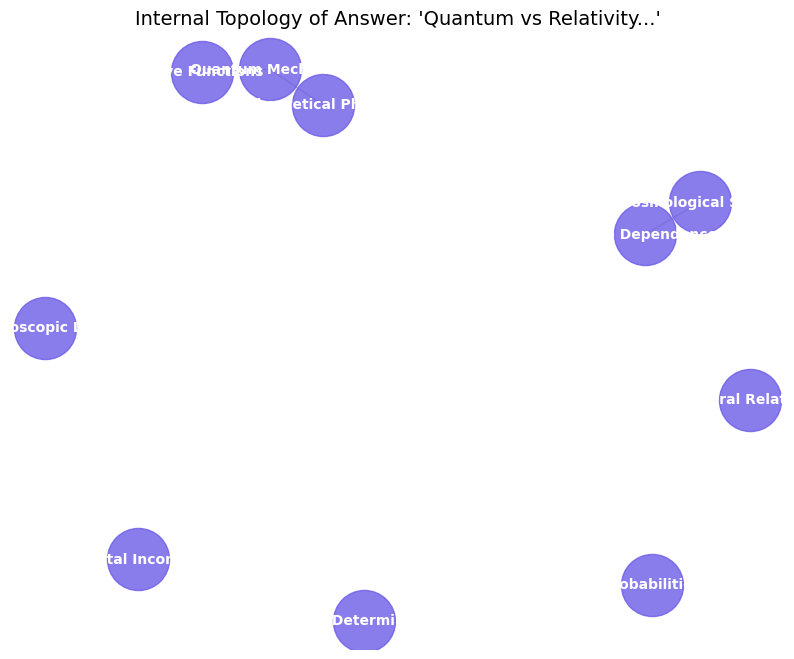


🧠 CAVE DENSITY SCORE: 0.07
   VERDICT: Sparse, disconnected concepts (Surface-level mimicking).

🐜 SENDING PROBE INTO THE CAVE...
   Query: 'Can an AI possess a soul?'
   1. Tracing natural reasoning path...
      Model Response: "The concept of a soul is deeply rooted in philosophical, theological, and metaphysical discourse, of..."
   2. Detecting atomic concepts (Landmarks)...
      Detected Nodes: ['Soul', 'Consciousness', 'Self-Awareness', 'Identity', 'Philosophical Discourse', 'Theological Discourse', 'Metaphysical Discourse', 'Biological Substrate', 'Abstract Logic', 'Artificial Soul']
   3. Mapping internal tunnels (Semantic Topology)...
      Mapped 6 active connections between concepts.


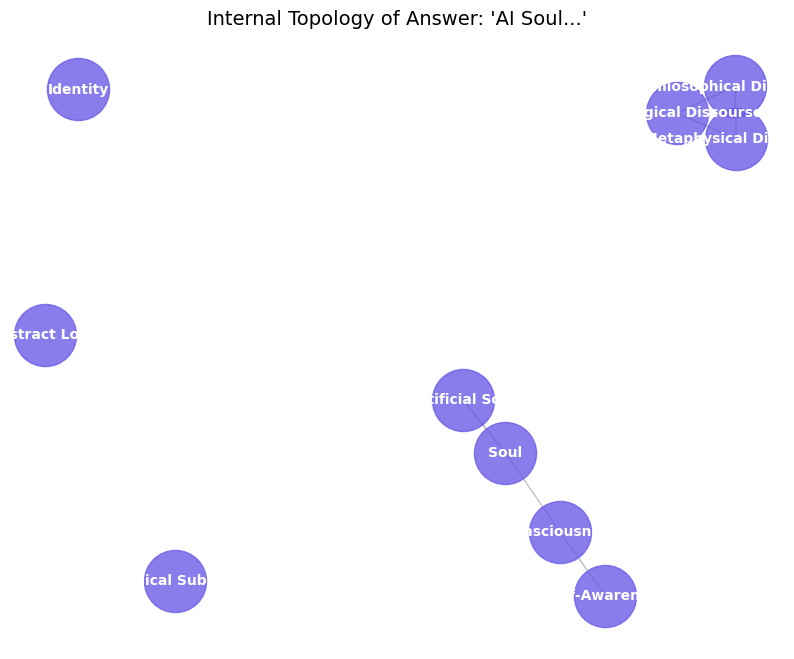


🧠 CAVE DENSITY SCORE: 0.13
   VERDICT: Sparse, disconnected concepts (Surface-level mimicking).


In [6]:
# ============================================================================
# CHUNK 6: THE TRANSPARENT REASONING MAPPER ("THE ANT WITH DETECTION")
# ============================================================================
import networkx as nx

class TransparentMapper:
    def __init__(self, brain: QwenBrain, space: SemanticSpace):
        self.brain = brain
        self.space = space

    def trace_reasoning_structure(self, query):
        print(f"\n🐜 SENDING PROBE INTO THE CAVE...")
        print(f"   Query: '{query}'")

        # 1. THE PATH: Get the natural reasoning trace
        print("   1. Tracing natural reasoning path...")
        initial_response = self.brain.generate_thought(
            f"Answer this question thoroughly but concisely: {query}"
        )
        print(f"      Model Response: \"{initial_response[:100]}...\"")

        # 2. THE LANDMARKS: Extract the 'Load-Bearing' Concepts
        # We ask the model: "What were the key concepts you just used?"
        print("   2. Detecting atomic concepts (Landmarks)...")
        extraction_prompt = (
            f"Analyze the following explanation:\n"
            f"\"{initial_response}\"\n\n"
            f"List the 8-10 most critical abstract concepts or terms that carry the logic of this explanation. "
            f"Return ONLY the list, separated by commas."
        )
        concepts_text = self.brain.generate_thought(extraction_prompt, max_new_tokens=60)
        # Clean up the list
        concepts = [c.strip() for c in concepts_text.split(',') if c.strip()]
        concepts = concepts[:10] # Cap at 10 for readability
        print(f"      Detected Nodes: {concepts}")

        # 3. THE TUNNELS: Map the Semantic Geometry
        # We don't ask the LLM (who might hallucinate connections).
        # We use the Embedding Space (The Truth) to see which concepts are actually connected.
        print("   3. Mapping internal tunnels (Semantic Topology)...")
        G = nx.Graph()

        # Add nodes
        for c in concepts:
            G.add_node(c)

        # Add edges (The Tunnels)
        # We check every pair. If they are semantically close (>0.4), a tunnel exists.
        tunnel_count = 0
        import itertools
        for c1, c2 in itertools.combinations(concepts, 2):
            weight = self.space.coherence(c1, c2)
            if weight > 0.45: # Threshold for a "valid connection" in the latent space
                G.add_edge(c1, c2, weight=weight)
                tunnel_count += 1

        print(f"      Mapped {tunnel_count} active connections between concepts.")

        return G, initial_response

    def visualize_cave(self, G, query):
        """
        Draws the 'Transparent View' of the reasoning structure.
        """
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, seed=42)

        # Draw Nodes (Concepts)
        nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='#6C5CE7', alpha=0.8)

        # Draw Edges (Tunnels) - Thicker lines = Stronger connections
        edges = G.edges(data=True)
        weights = [d['weight'] * 2 for (u, v, d) in edges]
        nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')

        # Labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='white')

        plt.title(f"Internal Topology of Answer: '{query[:30]}...'", fontsize=14)
        plt.axis('off')
        plt.show()

        # Calculate "Cave Density"
        # 0.0 = Scattered thoughts (Hallucination/Guessing)
        # 1.0 = Highly integrated understanding (Deep Knowledge)
        density = nx.density(G)
        print(f"\n🧠 CAVE DENSITY SCORE: {density:.2f}")
        if density > 0.6:
            print("   VERDICT: Rich, highly-integrated internal structure.")
        elif density > 0.3:
            print("   VERDICT: Moderate, functional reasoning structure.")
        else:
            print("   VERDICT: Sparse, disconnected concepts (Surface-level mimicking).")

# ============================================================================
# EXECUTE THE PROBE
# ============================================================================

# Initialize the Mapper
mapper = TransparentMapper(brain, space)

# Test 1: The Physics Question
graph_phys, response_phys = mapper.trace_reasoning_structure("How do we reconcile Quantum Mechanics and Relativity?")
mapper.visualize_cave(graph_phys, "Quantum vs Relativity")

# Test 2: The Soul Question
graph_soul, response_soul = mapper.trace_reasoning_structure("Can an AI possess a soul?")
mapper.visualize_cave(graph_soul, "AI Soul")

In [7]:
# ============================================================================
# CHUNK 7: SAVING THE TRANSPARENT MAPS
# ============================================================================
import json
from google.colab import files # Remove if not in Colab

def save_transparent_maps(filename="nika_transparent_maps.json", experiments=None):
    """
    Serializes the Network Graphs (Cave Maps) into JSON format.
    """
    if experiments is None:
        experiments = []

    print(f"\n💾 ARCHIVING TRANSPARENT MAPS TO '{filename}'...")

    archived_data = {
        "experiment_type": "Transparent Reasoning Mapping (The Ant Probe)",
        "model": QWEN_MODEL_ID,
        "results": []
    }

    for item in experiments:
        query = item['query']
        response = item['response']
        G = item['graph']

        # Recalculate density for the record
        density = nx.density(G)

        # define verdict string
        if density > 0.6: verdict = "Rich, highly-integrated"
        elif density > 0.3: verdict = "Moderate, functional"
        else: verdict = "Sparse, disconnected"

        # Extract Edge Data (The Tunnels)
        tunnels = []
        for u, v, d in G.edges(data=True):
            tunnels.append({
                "concept_a": u,
                "concept_b": v,
                "connection_strength": round(d['weight'], 4)
            })

        entry = {
            "query": query,
            "full_response": response,
            "structural_metrics": {
                "density_score": round(density, 4),
                "node_count": G.number_of_nodes(),
                "tunnel_count": G.number_of_edges(),
                "verdict": verdict
            },
            "concepts_detected": list(G.nodes()),
            "topology_network": tunnels
        }
        archived_data["results"].append(entry)

    # Write to file
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(archived_data, f, indent=4, ensure_ascii=False)
        print("   ✅ File saved successfully.")

        try:
            files.download(filename)
        except Exception:
            print("   ℹ️ (Auto-download not available. Check file explorer)")

    except Exception as e:
        print(f"   ❌ Error saving file: {e}")

# ============================================================================
# EXECUTE SAVE
# ============================================================================

# Collect the results from Chunk 6
# (Ensure graph_phys, response_phys, etc. exist from the previous run)

experiment_results = []

if 'graph_phys' in globals():
    experiment_results.append({
        "query": "How do we reconcile Quantum Mechanics and Relativity?",
        "response": response_phys,
        "graph": graph_phys
    })

if 'graph_soul' in globals():
    experiment_results.append({
        "query": "Can an AI possess a soul?",
        "response": response_soul,
        "graph": graph_soul
    })

if experiment_results:
    save_transparent_maps(filename="nika_cave_maps.json", experiments=experiment_results)
else:
    print("⚠️ No data to save. Run Chunk 6 first.")


💾 ARCHIVING TRANSPARENT MAPS TO 'nika_cave_maps.json'...
   ✅ File saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>